<a href="https://colab.research.google.com/github/dmherrera/Tesis/blob/main/Copia_de_%5BMediaPipe_Python_Tasks%5D_Face_Landmarker.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### Copyright 2023 The MediaPipe Authors. All Rights Reserved.

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Face Landmarks Detection with MediaPipe Tasks

This notebook shows you how to use MediaPipe Tasks Python API to detect face landmarks from images.

## Preparation

Let's start with installing MediaPipe.

In [ ]:
!pip install -q mediapipe==0.10.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.9/33.9 MB 42.6 MB/s eta 0:00:00


Then download the off-the-shelf model bundle(s). Check out the [MediaPipe documentation](https://developers.google.com/mediapipe/solutions/vision/face_landmarker#models) for more information about these model bundles.

In [ ]:
!wget -O face_landmarker_v2_with_blendshapes.task -q https://storage.googleapis.com/mediapipe-models/face_landmarker/face_landmarker/float16/1/face_landmarker.task

## Visualization utilities

In [ ]:
#@markdown We implemented some functions to visualize the face landmark detection results. <br/> Run the following cell to activate the functions.

from mediapipe import solutions
from mediapipe.framework.formats import landmark_pb2
import numpy as np
import matplotlib.pyplot as plt


def draw_landmarks_on_image(rgb_image, detection_result):
  face_landmarks_list = detection_result.face_landmarks
  annotated_image = np.copy(rgb_image)

  # Loop through the detected faces to visualize.
  for idx in range(len(face_landmarks_list)):
    face_landmarks = face_landmarks_list[idx]

    # Draw the face landmarks.
    face_landmarks_proto = landmark_pb2.NormalizedLandmarkList()
    face_landmarks_proto.landmark.extend([
      landmark_pb2.NormalizedLandmark(x=landmark.x, y=landmark.y, z=landmark.z) for landmark in face_landmarks
    ])

    solutions.drawing_utils.draw_landmarks(
        image=annotated_image,
        landmark_list=face_landmarks_proto,
        connections=mp.solutions.face_mesh.FACEMESH_TESSELATION,
        landmark_drawing_spec=None,
        connection_drawing_spec=mp.solutions.drawing_styles
        .get_default_face_mesh_tesselation_style())
    solutions.drawing_utils.draw_landmarks(
        image=annotated_image,
        landmark_list=face_landmarks_proto,
        connections=mp.solutions.face_mesh.FACEMESH_CONTOURS,
        landmark_drawing_spec=None,
        connection_drawing_spec=mp.solutions.drawing_styles
        .get_default_face_mesh_contours_style())
    solutions.drawing_utils.draw_landmarks(
        image=annotated_image,
        landmark_list=face_landmarks_proto,
        connections=mp.solutions.face_mesh.FACEMESH_IRISES,
          landmark_drawing_spec=None,
          connection_drawing_spec=mp.solutions.drawing_styles
          .get_default_face_mesh_iris_connections_style())

  return annotated_image

def plot_face_blendshapes_bar_graph(face_blendshapes):
  # Extract the face blendshapes category names and scores.
  face_blendshapes_names = [face_blendshapes_category.category_name for face_blendshapes_category in face_blendshapes]
  face_blendshapes_scores = [face_blendshapes_category.score for face_blendshapes_category in face_blendshapes]
  # The blendshapes are ordered in decreasing score value.
  face_blendshapes_ranks = range(len(face_blendshapes_names))

  fig, ax = plt.subplots(figsize=(12, 12))
  bar = ax.barh(face_blendshapes_ranks, face_blendshapes_scores, label=[str(x) for x in face_blendshapes_ranks])
  ax.set_yticks(face_blendshapes_ranks, face_blendshapes_names)
  ax.invert_yaxis()

  # Label each bar with values
  for score, patch in zip(face_blendshapes_scores, bar.patches):
    plt.text(patch.get_x() + patch.get_width(), patch.get_y(), f"{score:.4f}", va="top")

  ax.set_xlabel('Score')
  ax.set_title("Face Blendshapes")
  plt.tight_layout()
  plt.show()

## Download test image

Let's grab a test image that we'll use later. The image is from [Unsplash](https://unsplash.com/photos/mt2fyrdXxzk).

In [ ]:
!wget -q -O image.jpg https://storage.googleapis.com/mediapipe-assets/portrait.jpg

import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread("image.jpg")
cv2_imshow(img)

Optionally, you can upload your own image. If you want to do so, uncomment and run the cell below.

In [ ]:
 from google.colab import files
 uploaded = files.upload()

 for filename in uploaded:
   content = uploaded[filename]
   with open(filename, 'wb') as f:
     f.write(content)

 if len(uploaded.keys()):
   IMAGE_FILE = next(iter(uploaded))
   print('Uploaded file:', IMAGE_FILE)

Saving 6.jpg to 6.jpg
Uploaded file: 6.jpg


## Running inference and visualizing the results

Here are the steps to run face landmark detection using MediaPipe.

Check out the [MediaPipe documentation](https://developers.google.com/mediapipe/solutions/vision/face_landmarker/python) to learn more about configuration options that this task supports.


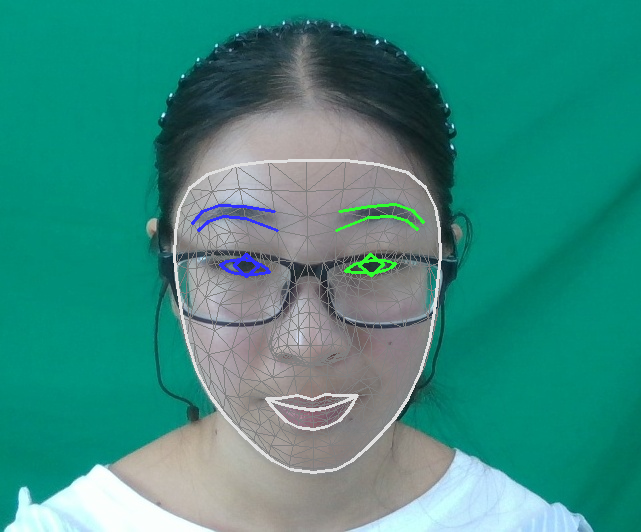

In [ ]:
# STEP 1: Import the necessary modules.
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision

# STEP 2: Create an FaceLandmarker object.
base_options = python.BaseOptions(model_asset_path='face_landmarker_v2_with_blendshapes.task')
options = vision.FaceLandmarkerOptions(base_options=base_options,
                                       output_face_blendshapes=True,
                                       output_facial_transformation_matrixes=True,
                                       num_faces=1)
detector = vision.FaceLandmarker.create_from_options(options)

# STEP 3: Load the input image.
image = mp.Image.create_from_file("")

# STEP 4: Detect face landmarks from the input image.
detection_result = detector.detect(image)

# STEP 5: Process the detection result. In this case, visualize it.
annotated_image = draw_landmarks_on_image(image.numpy_view(), detection_result)
cv2_imshow(cv2.cvtColor(annotated_image, cv2.COLOR_RGB2BGR))

We will also visualize the face blendshapes categories using a bar graph.

[Category(index=0, score=3.0928416094866407e-07, display_name='', category_name='_neutral'), Category(index=1, score=4.338460712460801e-05, display_name='', category_name='browDownLeft'), Category(index=2, score=1.9606926798587665e-05, display_name='', category_name='browDownRight'), Category(index=3, score=0.8547910451889038, display_name='', category_name='browInnerUp'), Category(index=4, score=0.7859991788864136, display_name='', category_name='browOuterUpLeft'), Category(index=5, score=0.7556081414222717, display_name='', category_name='browOuterUpRight'), Category(index=6, score=3.113925049547106e-05, display_name='', category_name='cheekPuff'), Category(index=7, score=1.7052904865977325e-07, display_name='', category_name='cheekSquintLeft'), Category(index=8, score=2.9087689767948177e-07, display_name='', category_name='cheekSquintRight'), Category(index=9, score=0.24704742431640625, display_name='', category_name='eyeBlinkLeft'), Category(index=10, score=0.1129935160279274, disp

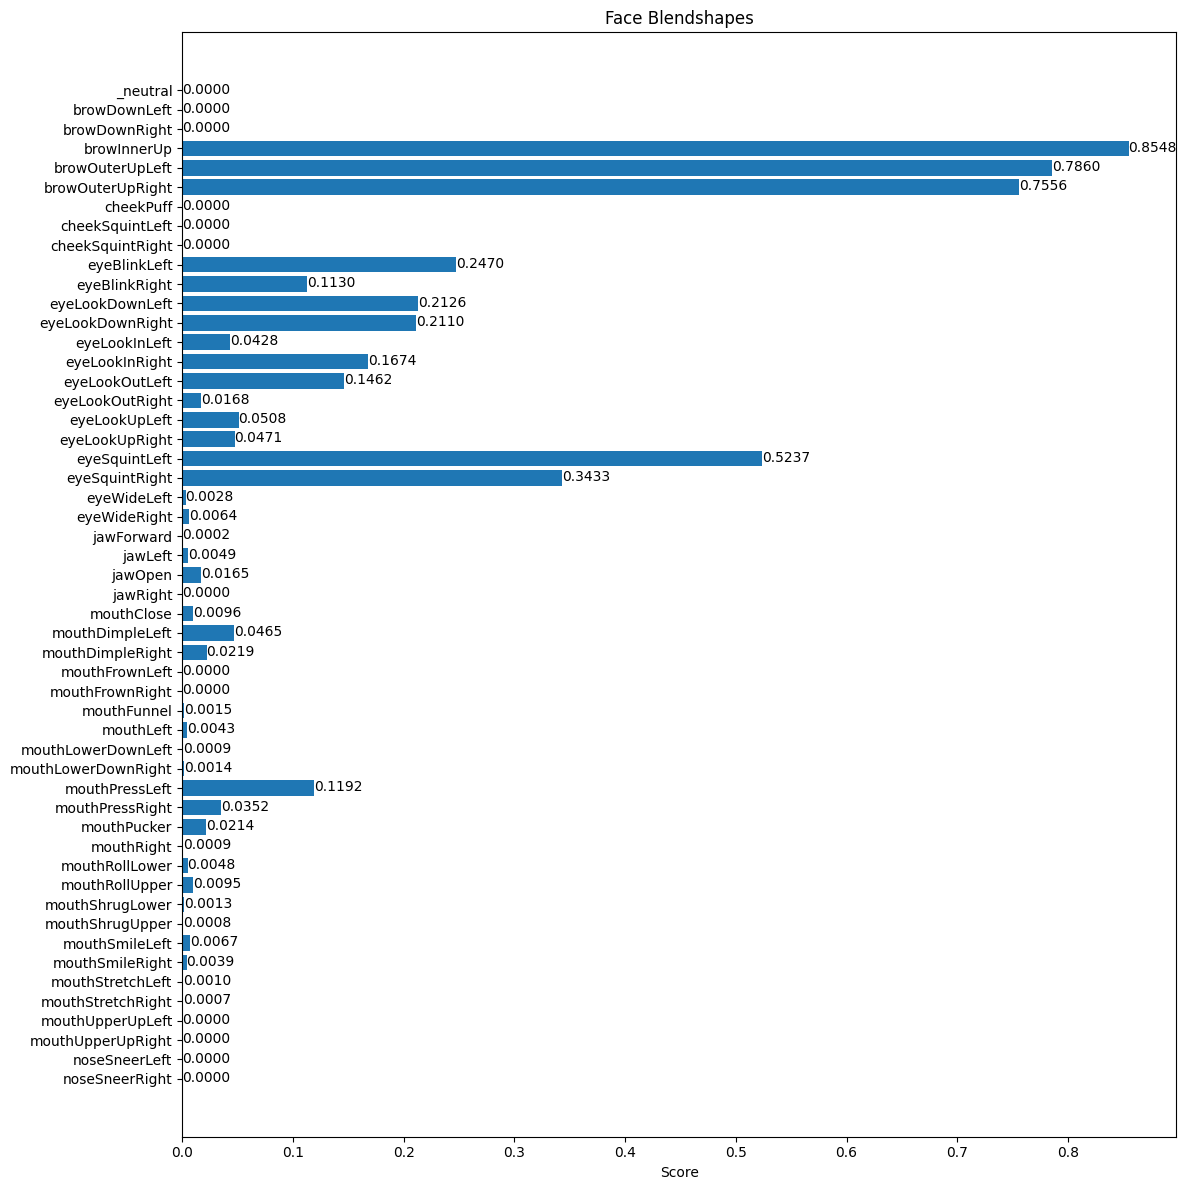

In [ ]:
results = detection_result.face_blendshapes[0]
#print(results)
#plot_face_blendshapes_bar_graph(detection_result.face_blendshapes[0])

In [ ]:

newValues = []
num = 0.10
for x in results:
  name = x.category_name
  score = x.score
  if score >= num:
    newValues += name, score



In [ ]:
print(newValues)


['browInnerUp', 0.8547910451889038, 'browOuterUpLeft', 0.7859991788864136, 'browOuterUpRight', 0.7556081414222717, 'eyeBlinkLeft', 0.24704742431640625, 'eyeBlinkRight', 0.1129935160279274, 'eyeLookDownLeft', 0.2125609964132309, 'eyeLookDownRight', 0.21096497774124146, 'eyeLookInRight', 0.16744506359100342, 'eyeLookOutLeft', 0.14617058634757996, 'eyeSquintLeft', 0.5236557126045227, 'eyeSquintRight', 0.343349426984787, 'mouthPressLeft', 0.11917849630117416]


In [ ]:
floats = []
i = 0
for value in newValues:
  if type(value) == float:

    floats.append(value)
    newValues.remove(value)




In [ ]:
print(floats)
print(newValues)


[0.8547910451889038, 0.7859991788864136, 0.7556081414222717, 0.24704742431640625, 0.1129935160279274, 0.2125609964132309, 0.21096497774124146, 0.16744506359100342, 0.14617058634757996, 0.5236557126045227, 0.343349426984787, 0.11917849630117416]
['browInnerUp', 'browOuterUpLeft', 'browOuterUpRight', 'eyeBlinkLeft', 'eyeBlinkRight', 'eyeLookDownLeft', 'eyeLookDownRight', 'eyeLookInRight', 'eyeLookOutLeft', 'eyeSquintLeft', 'eyeSquintRight', 'mouthPressLeft']


In [ ]:
newDict = {newValues[i] : floats[i] for i in range(len(newValues))}

In [ ]:
happy = {}

In [ ]:

happy['img4'] = newDict

In [ ]:
print(happy)

{'img6': {'browInnerUp': 0.2589815855026245, 'browOuterUpLeft': 0.11560218781232834, 'eyeBlinkLeft': 0.16210925579071045, 'eyeBlinkRight': 0.11711786687374115, 'eyeLookDownLeft': 0.11653541773557663, 'eyeLookDownRight': 0.1102648675441742, 'eyeLookInRight': 0.10858038812875748, 'eyeSquintLeft': 0.4419199824333191, 'eyeSquintRight': 0.46751469373703003, 'mouthSmileLeft': 0.42508384585380554, 'mouthSmileRight': 0.4480666518211365}, 'img4': {'browInnerUp': 0.8547910451889038, 'browOuterUpLeft': 0.7859991788864136, 'browOuterUpRight': 0.7556081414222717, 'eyeBlinkLeft': 0.24704742431640625, 'eyeBlinkRight': 0.1129935160279274, 'eyeLookDownLeft': 0.2125609964132309, 'eyeLookDownRight': 0.21096497774124146, 'eyeLookInRight': 0.16744506359100342, 'eyeLookOutLeft': 0.14617058634757996, 'eyeSquintLeft': 0.5236557126045227, 'eyeSquintRight': 0.343349426984787, 'mouthPressLeft': 0.11917849630117416}}


In [ ]:
import json

json_object = json.dumps(happy, indent = 4)
print(json_object)

{
    "img6": {
        "browInnerUp": 0.2589815855026245,
        "browOuterUpLeft": 0.11560218781232834,
        "eyeBlinkLeft": 0.16210925579071045,
        "eyeBlinkRight": 0.11711786687374115,
        "eyeLookDownLeft": 0.11653541773557663,
        "eyeLookDownRight": 0.1102648675441742,
        "eyeLookInRight": 0.10858038812875748,
        "eyeSquintLeft": 0.4419199824333191,
        "eyeSquintRight": 0.46751469373703003,
        "mouthSmileLeft": 0.42508384585380554,
        "mouthSmileRight": 0.4480666518211365
    },
    "img4": {
        "browInnerUp": 0.8547910451889038,
        "browOuterUpLeft": 0.7859991788864136,
        "browOuterUpRight": 0.7556081414222717,
        "eyeBlinkLeft": 0.24704742431640625,
        "eyeBlinkRight": 0.1129935160279274,
        "eyeLookDownLeft": 0.2125609964132309,
        "eyeLookDownRight": 0.21096497774124146,
        "eyeLookInRight": 0.16744506359100342,
        "eyeLookOutLeft": 0.14617058634757996,
        "eyeSquintLeft": 0.52365571

In [ ]:
with open("json.json", "w") as outfile:
    outfile.write(json_string)

In [ ]:
print(results.category_name)

browDownLeft


And print the transformation matrix.

In [ ]:
print(detection_result.facial_transformation_matrixes)

[array([[ 9.99079227e-01, -1.09205898e-02,  4.14807685e-02,
        -3.62901270e-01],
       [ 1.79251749e-02,  9.84854519e-01, -1.72452778e-01,
        -1.38551140e+00],
       [-3.89692225e-02,  1.73037723e-01,  9.84143555e-01,
        -2.35710201e+01],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]])]
